In [154]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import scipy.stats as sts

In [155]:
# Files to load
city_file_load = 'Resources/city_data.csv'
ride_file_load = 'Resources/ride_data.csv'

# Read the city data file and store it in a pandas DataFrame.
# Read the ride data file and store it in a pandas DataFrame.

city_data_df = pd.read_csv(city_file_load)
ride_data_df = pd.read_csv(ride_file_load)

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [156]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [157]:
# Get the columns and the rows that are not null.

city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [158]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [159]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [160]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [161]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [162]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [163]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [164]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [165]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [166]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [167]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [168]:
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [169]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [170]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [171]:
# Get the number of rides for suburban and rural cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [172]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [173]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()
urban_avg_fare.

SyntaxError: invalid syntax (516748088.py, line 4)

In [174]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [175]:
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [176]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [177]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [178]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

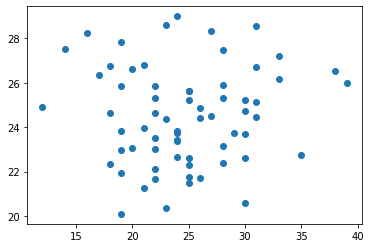

In [179]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare)

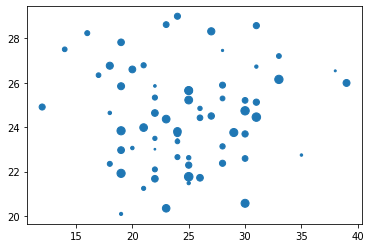

In [180]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare, s = urban_driver_count)

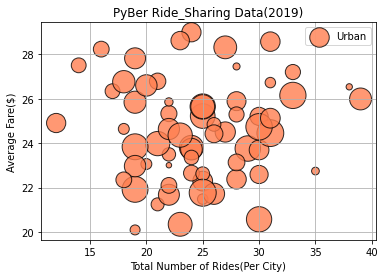

In [181]:
# Build the scatter plots for urban cities.
plt.scatter(
    urban_ride_count, urban_avg_fare, 
    color = "coral", label = "Urban",
    edgecolor="black",linewidths= 1,
    alpha= 0.8, s = [i * 10 for i in urban_driver_count])
plt.title("PyBer Ride_Sharing Data(2019)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.grid(True)
# Add the legend.
plt.legend()

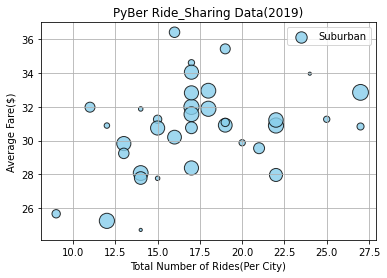

In [182]:
# Build the scatter plots for suburban cities.
plt.scatter(
    suburban_ride_count, suburban_avg_fare, 
    c = "skyblue", label = "Suburban",
    edgecolor="black",linewidths= 1,
    alpha= 0.8, s = [i * 10 for i in suburban_driver_count])
plt.title("PyBer Ride_Sharing Data(2019)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.grid(True)
# Add the legend.
plt.legend()

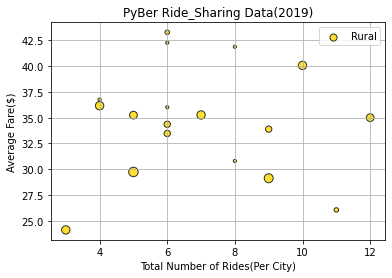

In [183]:
# Build the scatter plots for suburban cities.
plt.scatter(
    rural_ride_count, rural_avg_fare, 
    c = "gold", label = "Rural",
    edgecolor="black",linewidths= 1,
    alpha= 0.8, s = [i * 10 for i in rural_driver_count])
plt.title("PyBer Ride_Sharing Data(2019)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.grid(True)
# Add the legend.
plt.legend()

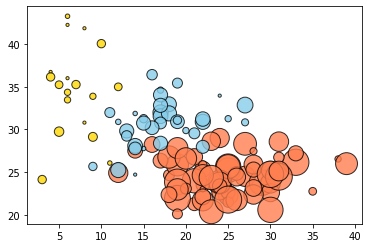

In [184]:
# Add the scatter charts for each type of city.
plt.scatter(
    urban_ride_count, urban_avg_fare, 
    color = "coral", label = "Urban",
    edgecolor="black",linewidths= 1,
    alpha= 0.8, s = [i * 10 for i in urban_driver_count])
plt.scatter(
    suburban_ride_count, suburban_avg_fare, 
    c = "skyblue", label = "Suburban",
    edgecolor="black",linewidths= 1,
    alpha= 0.8, s = [i * 10 for i in suburban_driver_count])
plt.scatter(
    rural_ride_count, rural_avg_fare, 
    c = "gold", label = "Rural",
    edgecolor="black",linewidths= 1,
    alpha= 0.8, s = [i * 10 for i in rural_driver_count])

# Show the plot
plt.show()

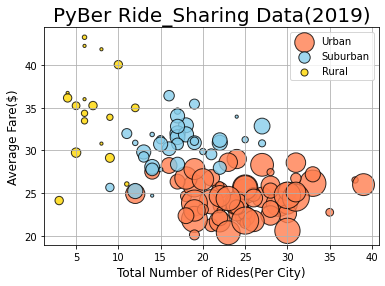

In [185]:
# Build the scatter charts for each city type.
plt.scatter(
    urban_ride_count, urban_avg_fare, 
    color = "coral", label = "Urban",
    edgecolor="black",linewidths= 1,
    alpha= 0.8, s = [i * 10 for i in urban_driver_count])
plt.scatter(
    suburban_ride_count, suburban_avg_fare, 
    c = "skyblue", label = "Suburban",
    edgecolor="black",linewidths= 1,
    alpha= 0.8, s = [i * 10 for i in suburban_driver_count])
plt.scatter(
    rural_ride_count, rural_avg_fare, 
    c = "gold", label = "Rural",
    edgecolor="black",linewidths= 1,
    alpha= 0.8, s = [i * 10 for i in rural_driver_count])

plt.title("PyBer Ride_Sharing Data(2019)", fontsize= 20)
plt.xlabel("Total Number of Rides(Per City)", fontsize= 12)
plt.ylabel("Average Fare($)", fontsize= 12)
plt.grid(True)

# Add the legend.
plt.legend()

# Show the plot
plt.show()

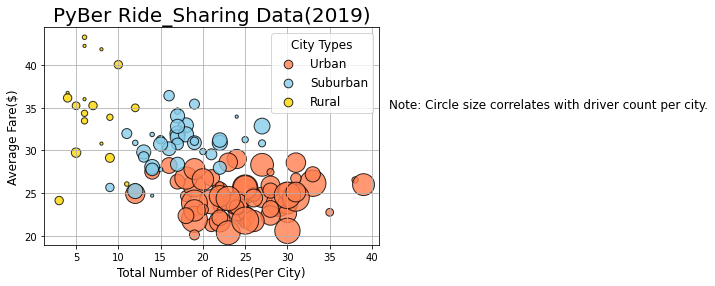

In [186]:
# Build the scatter charts for each city type.
plt.scatter(
    urban_ride_count, urban_avg_fare, 
    color = "coral", label = "Urban",
    edgecolor="black",linewidths= 1,
    alpha= 0.8, s = [i * 10 for i in urban_driver_count])
plt.scatter(
    suburban_ride_count, suburban_avg_fare, 
    c = "skyblue", label = "Suburban",
    edgecolor="black",linewidths= 1,
    alpha= 0.8, s = [i * 10 for i in suburban_driver_count])
plt.scatter(
    rural_ride_count, rural_avg_fare, 
    c = "gold", label = "Rural",
    edgecolor="black",linewidths= 1,
    alpha= 0.8, s = [i * 10 for i in rural_driver_count])

plt.title("PyBer Ride_Sharing Data(2019)", fontsize= 20)
plt.xlabel("Total Number of Rides(Per City)", fontsize= 12)
plt.ylabel("Average Fare($)", fontsize= 12)
plt.grid(True)

# Add the legend.
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Analysis/Fig1.png")

# Show the plot
plt.show()

In [187]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [188]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [189]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [190]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [191]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [192]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [193]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [194]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [195]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [196]:
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [197]:
rural_ride_count.mode()

0    6
Name: ride_id, dtype: int64